[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/18oiTP8FLPONGeZePrPq_TWUTGCH8hzdl?usp=sharing)

# Natural Language Processing on Amazon books review dataset

---

### Dhruv Shah, Jenn Hong, Santiago Mazzei, Setu Shah, Victor Floriano

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Download the data from Google Drive
!gdown 1GGcWJn9u4efQGt-HMx7UknvvXuhwHAAe

Downloading...
From: https://drive.google.com/uc?id=1GGcWJn9u4efQGt-HMx7UknvvXuhwHAAe
To: /content/random_sample_100.json
100% 55.9M/55.9M [00:01<00:00, 47.0MB/s]


In [3]:
# Read JSON file into a dataframe
df = pd.read_json('/content/random_sample_100.json')
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,vote
0,5,False,"01 23, 2017",A1YTZAZZ1L32RL,0002005263,{'Format:': ' Kindle Edition'},Chuck,Ok reading,Ok,1485129600,NaN,NaN
1,5,True,"08 3, 2014",A3EHZMD24B5BQ0,0002005263,{'Format:': ' Paperback'},Sola49,Good,Five Stars,1407024000,NaN,NaN
2,5,True,"07 9, 2013",A38ZMH9LRCZL3X,0001381733,{'Format:': ' Hardcover'},A. E. Stoff,I purchased it for my new great-granddaughter....,New Book for New Grandchild,1373328000,NaN,NaN
3,5,True,"12 3, 2017",AYMEYAL8G7LJB,0001384198,{'Format:': ' Hardcover'},MARILYN,A very nice replica of the original classic.,Excellent reproduction of the timeless classic.,1512259200,NaN,NaN
4,3,False,"10 4, 2011",A39QEKNEFSJ34Q,0002005263,{'Format:': ' Unknown Binding'},hrladyship,If you're thinking of buying The Sinister Pig ...,And the hero is . . .,1317686400,NaN,NaN


In [4]:
# Download the metadata from Google Drive
!gdown 1JYb0PpOBmQKokFBl8YB7WTQFKYpKu9e8

Downloading...
From (original): https://drive.google.com/uc?id=1JYb0PpOBmQKokFBl8YB7WTQFKYpKu9e8
From (redirected): https://drive.google.com/uc?id=1JYb0PpOBmQKokFBl8YB7WTQFKYpKu9e8&confirm=t&uuid=d13cc586-6968-4c1d-9cf1-2fd25c4feec6
To: /content/books_meta_short.csv
100% 253M/253M [00:02<00:00, 117MB/s]


In [5]:
# Read CSV with metadata
meta_data = pd.read_csv('/content/books_meta_short.csv')

In [6]:
# Perform a left join to add metadata information (title, price)
# to each book for each book review
merged_df = pd.merge(df, meta_data, on='asin', how='left')

In [7]:
#Remove original dataframes
import gc #garbage collector for deleted dataframes

del df
del meta_data

gc.collect

<function gc.collect(generation=2)>

In [8]:
# Taking a sample of the merged_df because it crashes otherwise

merged_df = merged_df.sample(frac=0.35, random_state=1)

In [9]:
# Check data types and columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21385 entries, 3009 to 54996
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         21385 non-null  int64 
 1   verified        21385 non-null  bool  
 2   reviewTime      21385 non-null  object
 3   reviewerID      21385 non-null  object
 4   asin            21385 non-null  object
 5   style           20371 non-null  object
 6   reviewerName    21384 non-null  object
 7   reviewText      21385 non-null  object
 8   summary         21381 non-null  object
 9   unixReviewTime  21385 non-null  int64 
 10  image           47 non-null     object
 11  vote            4039 non-null   object
 12  Unnamed: 0      21385 non-null  int64 
 13  title           21385 non-null  object
 14  price           18313 non-null  object
dtypes: bool(1), int64(3), object(11)
memory usage: 2.5+ MB


## Data Preprocessing

---

In [10]:
# Convert style from dictionary into standard dataframe column
merged_df['style'] = merged_df['style'].apply(lambda x: x['Format:'].strip()\
                                if pd.notnull(x) and 'Format:' in x else x)

merged_df['style'].head()

3009                 Paperback
31323           Kindle Edition
30662                      NaN
39284           Kindle Edition
17217    Mass Market Paperback
Name: style, dtype: object

In [11]:
# Drop image column since it is beyond of the scope of this project
merged_df.drop(columns='image', inplace=True)

In [12]:
# Dropping 'unnamed 0' column as it is just the index of the meta data column
merged_df.drop(columns='Unnamed: 0', inplace=True)

In [13]:
# Check all unique values for each column, this will help us check the nature of
# each variable and if there are more missing values listed as '?' or 'missing'

#Print unique values for each variable
print("Unique values in 'overall':", merged_df['overall'].unique(), "\n")
print("Unique values in 'verified':", merged_df['verified'].unique(), "\n")
print("Unique values in 'reviewTime':", merged_df['reviewTime'].unique(), "\n")
print("Unique values in 'reviewerID':", merged_df['reviewerID'].unique(), "\n")
print("Unique values in 'asin':", merged_df['asin'].unique(), "\n")
print("Unique values in 'style':", merged_df['style'].unique(), "\n")
print("Unique values in 'reviewerName':", merged_df['reviewerName'].unique(), "\n")
print("Unique values in 'reviewText':", merged_df['reviewText'].unique(), "\n")
print("Unique values in 'summary':", merged_df['summary'].unique(), "\n")
print("Unique values in 'unixReviewTime':", merged_df['unixReviewTime'].unique(), "\n")
print("Unique values in 'vote':", merged_df['vote'].unique(), "\n")

Unique values in 'overall': [5 3 4 2 1] 

Unique values in 'verified': [ True False] 

Unique values in 'reviewTime': ['08 7, 2017' '06 8, 2015' '02 3, 2016' ... '11 9, 2009' '02 12, 1999'
 '09 21, 2009'] 

Unique values in 'reviewerID': ['AV24Y4VN0PEJH' 'A13CGSP0OJ2WJC' 'A30RQOLY8P3V86' ... 'A2NV8Z90MQARTR'
 'A37I0SFN56638P' 'A3FHSO1SKHU378'] 

Unique values in 'asin': ['0002171856' '0007480849' '0007449313' ... '0007481136' '0029254353'
 '0006531555'] 

Unique values in 'style': ['Paperback' 'Kindle Edition' nan 'Mass Market Paperback' 'Hardcover'
 'DVD' 'Board book' 'Loose Leaf' 'Spiral-bound' 'Audio CD'
 'Hardcover-spiral' 'Imitation Leather' 'Leather Bound'
 'Audible Audiobook' 'Library Binding' 'Kindle Edition with Audio/Video'
 'Audio Cassette' 'School & Library Binding' 'Amazon Video' 'MP3 CD'
 'Ring-bound' 'Unknown Binding' 'Vinyl Bound' 'MP3 Music' 'Vinyl'
 'Plastic Comb' 'DVD-ROM' 'Calendar' 'Map' 'DVD Audio' 'Rag Book' 'Poster'] 

Unique values in 'reviewerName': ['Bill Com

In [14]:
# Drop reviewerName, reviewerID, and unixReviewTime (we already have a review time variable)
merged_df.drop(columns=['reviewerName','reviewerID', 'unixReviewTime'], inplace=True)

In [15]:
# Convert reviewTime to datetime (previously an object type)
merged_df['reviewTime'] = pd.to_datetime(merged_df['reviewTime'], format='%m %d, %Y')

In [16]:
# Check distribution of scores
print('Distribution of Book overall ratings:')
merged_df['overall'].value_counts(normalize=True)

Distribution of Book overall ratings:


5    0.627823
4    0.204022
3    0.089829
2    0.042132
1    0.036194
Name: overall, dtype: float64

In [17]:
print('Distribution of Book formats')
merged_df['style'].value_counts(normalize=True)

Distribution of Book formats


Kindle Edition                     0.483727
Paperback                          0.230867
Hardcover                          0.186098
Mass Market Paperback              0.064994
Audio CD                           0.010407
Board book                         0.009474
Audible Audiobook                  0.002504
Audio Cassette                     0.001865
Kindle Edition with Audio/Video    0.001620
Library Binding                    0.001522
Imitation Leather                  0.000933
Spiral-bound                       0.000835
Leather Bound                      0.000835
Unknown Binding                    0.000638
MP3 CD                             0.000540
School & Library Binding           0.000491
Amazon Video                       0.000491
DVD                                0.000393
Ring-bound                         0.000344
Hardcover-spiral                   0.000245
MP3 Music                          0.000196
Map                                0.000196
Vinyl                           

In [18]:
merged_df.head()

,overall,verified,reviewTime,asin,style,reviewText,summary,vote,title,price
3009,5,True,2017-08-07,0002171856,Paperback,This is the best Survival guide out there and ...,Best Survival Guide Ever!,NaN,The Sas Survival Handbook,$9.45
31323,5,True,2015-06-08,0007480849,Kindle Edition,This was a fantastic book. Showing the normal...,This was a fantastic book. Showing the normal ...,NaN,FORGOTTEN SEAMSTRESS- PB,$13.37
30662,5,True,2016-02-03,0007449313,NaN,I have loved this book from the first time I r...,I have loved this book from the first time I r...,NaN,Pride &amp; Prejudice (Collins Classics),$24.99
39284,3,True,2017-01-10,0007925565,Kindle Edition,"It may be a classic, but it's a boring classi...",but it's a boring classic.,NaN,Moby Dick (Collins Classics),NaN
17217,5,False,2013-09-11,0007176236,Mass Market Paperback,I love this fun book. Janet Evanovich's books...,Huge fan!,NaN,METRO GIRL (Alex Barnaby),$24.98


### Dealing With Missing Values

---

In [19]:
# Looking at NULL values
merged_df.isna().sum() / len(merged_df) * 100

overall        0.000000
verified       0.000000
reviewTime     0.000000
asin           0.000000
style          4.741641
reviewText     0.000000
summary        0.018705
vote          81.112930
title          0.000000
price         14.365209
dtype: float64

In [20]:
# Filling in the NULL values, 0 for vote (no one voted that review to be helpful), style as unknown, and price as median as per descriptive statistics

merged_df['vote'] = merged_df['vote'].fillna(0)
merged_df['style'] = merged_df['style'].fillna("unknown")
merged_df['price'] = merged_df['price'].fillna(13.39)

In [21]:
# Cleaning up the price column which has this one formatting issue and changing the dtype to integer

merged_df['price'] = merged_df['price'].replace(".a-section.a-spacing-mini{margin-bottom:6px!important;margin-top:10px}#actionPanel #availability{font-size:17px!important;font-weight:400!important}#actionPanel #availability p#pa_other_website_text{color:#888!important;margin-top:6px}#actionPanel #merchant-info{font-size:13px;color:#333}#actionPanel #pa_avaliability_message{font-size:12px!important;font-weight:400!important}#actionPanel #pa_avaliability_message a{white-space:normal!important}#actionPanel #pa_avaliability_message span{color:#888!important}#actionPanel #availability-brief #availability+br{display:none}// This is an empty file #actionPanel #bbop-sbbop-container{margin-bottom:0}#actionPanel .buybox-main{padding:0 40px}#actionPanel #priceblock_ourprice_row span.feature img{padding-top:8px!important}#actionPanel #onetimeOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger),#actionPanel #usedOption .a-radio-label #priceBadging_feature_div a:not(.a-popover-trigger){display:none}#actionPanel #pa_feedbackForm_rootmain{text-align:center}.burj #buybox_feature_div #deal #regularBuybox{margin-bottom:14px!important}.burj #hero-quick-promo hr{display:none}#actionPanel #hqp{margin-top:26px}#actionPanel #hqp #amsDetailRight{margin-bottom:18px}#actionPanel #hqp #amsDetailRightWide{margin-bottom:18px}#actionPanel #hqp #hqp-left{margin-bottom:18px}div#hqp-bottom.a-section.burj{margin-bottom:0}.burj #instantOrderUpdate_feature_div", np.NaN)
merged_df['price'] = merged_df['price'].str.replace('$', '').astype(float)

<ipython-input-21-9245d48b8fa3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['price'] = merged_df['price'].str.replace('$', '').astype(float)


In [22]:
merged_df['price'].describe()

count    17545.000000
mean        23.652554
std         55.474282
min          0.010000
25%          8.000000
50%         13.420000
75%         22.810000
max        972.490000
Name: price, dtype: float64

In [23]:
# Dropping null values for review and summary since they have such low %

merged_df.dropna(inplace=True)

In [24]:
# Checking the values of vote to find the mismatched one
merged_df['vote'].unique()

array([0, '2', '4', '3', '19', '7', '5', '15', '12', '13', '36', '11',
       '18', '6', '14', '8', '96', '41', '26', '21', '9', '77', '33',
       '17', '42', '89', '24', '22', '20', '16', '299', '64', '35', '45',
       '128', '25', '28', '69', '40', '38', '30', '23', '10', '48', '60',
       '429', '212', '29', '31', '27', '135', '43', '32', '73', '68',
       '123', '51', '50', '34', '88', '49', '39', '92', '52', '213', '37',
       '181', '119', '199', '82', '44', '229', '84', '95', '80', '46',
       '104', '71', '47', '87', '58', '254', '55', '108', '190', '70',
       '143', '201', '54', '66', '102', '796', '75', '67', '105', '312',
       '61', '101', '148', '133', '154', '290', '132', '606', '56', '116',
       '548', '81', '93', '62', '231', '94', '112'], dtype=object)

In [25]:
# Changing the dtype of verified to 0 and 1, changing the dtype of vote to int
merged_df['verified'] = merged_df['verified'].astype(int)
merged_df['vote'] = merged_df['vote'].replace('6,547', '6547').astype(int)

In [26]:
# Creating and adding a new column that has the number of reviews for each book

count_df = pd.DataFrame(merged_df['asin'].value_counts())
count_df = count_df.reset_index()
count_df.columns = ['asin', 'total_review_count']

merged_df = pd.merge(merged_df, count_df, on='asin', how='left')

In [27]:
#adding columns for year, month, date so we can use the reviewtime column for clustering

merged_df['year'] = merged_df['reviewTime'].dt.year
merged_df['day_of_week'] = merged_df['reviewTime'].dt.dayofweek
merged_df['month'] = merged_df['reviewTime'].dt.month
merged_df

,overall,verified,reviewTime,asin,style,reviewText,summary,vote,title,price,total_review_count,year,day_of_week,month
0,5,1,2017-08-07,0002171856,Paperback,This is the best Survival guide out there and ...,Best Survival Guide Ever!,0,The Sas Survival Handbook,9.45,40,2017,0,8
1,5,1,2015-06-08,0007480849,Kindle Edition,This was a fantastic book. Showing the normal...,This was a fantastic book. Showing the normal ...,0,FORGOTTEN SEAMSTRESS- PB,13.37,14,2015,0,6
2,5,1,2016-02-03,0007449313,unknown,I have loved this book from the first time I r...,I have loved this book from the first time I r...,0,Pride &amp; Prejudice (Collins Classics),24.99,80,2016,2,2
3,5,0,2013-09-11,0007176236,Mass Market Paperback,I love this fun book. Janet Evanovich's books...,Huge fan!,0,METRO GIRL (Alex Barnaby),24.98,17,2013,2,9
4,4,1,2017-04-07,0002255863,Paperback,"Reading through, it almost feels like what one...",it almost feels like what one would imagine th...,2,The God of Small Things,5.49,20,2017,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17536,4,1,2017-02-09,0007177437,Kindle Edition,Excellent read. I couldn't put it down.,Four Stars,0,PEOPLE OF THE BOOK,15.99,26,2017,3,2
17537,5,1,2014-08-29,0007531966,Kindle Edition,Growing older and wiser with J P? Love all J @...,Love all J @ Jances books,0,Second Watch,13.44,34,2014,4,8
17538,4,0,2002-09-21,0060082194,Mass Market Paperback,"Jackie Burke is caught with $50,000.00 and som...",RUM PUNCH HAS SOME PUNCH!!!,0,Rum Punch,25.13,3,2002,5,9
17539,5,0,2001-08-10,000711835X,Imitation Leather,I was stunned. I have never read a book where...,"Amazing, shocking, a truly brilliant work of art!",4,The Hobbit,77.95,632,2001,4,8


In [28]:
# Pulling out the variables we want

clustering_df = merged_df[['overall', 'verified', 'vote', 'price', 'total_review_count', 'year', 'day_of_week', 'month']]

In [29]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17541 entries, 0 to 17540
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overall             17541 non-null  int64  
 1   verified            17541 non-null  int64  
 2   vote                17541 non-null  int64  
 3   price               17541 non-null  float64
 4   total_review_count  17541 non-null  int64  
 5   year                17541 non-null  int64  
 6   day_of_week         17541 non-null  int64  
 7   month               17541 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 1.2 MB


## Analysis

---

### Dimension Reduction


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(clustering_df)

df_normalized = pd.DataFrame(normalized_data, columns=clustering_df.columns)

df_normalized

,overall,verified,vote,price,total_review_count,year,day_of_week,month
0,0.641889,0.659518,-0.140214,-0.256064,-0.354224,0.985245,-1.472288,0.485674
1,0.641889,0.659518,-0.140214,-0.185406,-0.488842,0.490790,-1.472288,-0.090104
2,0.641889,0.659518,-0.140214,0.024044,-0.147118,0.738018,-0.469165,-1.241658
3,0.641889,-1.516259,-0.140214,0.023864,-0.473309,-0.003665,-0.469165,0.773562
4,-0.309795,0.659518,0.013135,-0.327443,-0.457776,0.985245,0.533958,-0.665881
...,...,...,...,...,...,...,...,...
17536,-0.309795,0.659518,-0.140214,-0.138181,-0.426711,0.985245,0.032397,-1.241658
17537,0.641889,0.659518,-0.140214,-0.184145,-0.385289,0.243563,0.533958,0.485674
17538,-0.309795,-1.516259,-0.140214,0.026567,-0.545796,-2.723167,1.035519,0.773562
17539,0.641889,-1.516259,0.166485,0.978648,2.710941,-2.970394,0.533958,0.485674


In [31]:
# Principal Component Analysis
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt

# Fit PCA model on dataset
model = PCA()
model.fit(df_normalized)
transformed_data = model.transform(df_normalized)

pca_data = pd.DataFrame(transformed_data)

column_names = []
for k in range(1, 9):
  column_names.append("PCA " + str(k))

pca_data.columns = column_names

# Plot variance per Principal Component
cumulative_var = np.cumsum(model.explained_variance_ratio_*100)
px.line(cumulative_var, title='Variance Captured by Each Principal Component', labels={'value': 'Cumulative Variance', 'index':'Principal Component'})

### KMeans Clustering

---

In [33]:
# KMeans Clustering
from sklearn.cluster import KMeans

num_clusters = 4
kmeans_df = clustering_df
kmeans_result = KMeans(num_clusters,init='random', n_init = 'auto', random_state = 0).fit(df_normalized)
kmeans_df['cluster_labels'] = kmeans_result.labels_

<ipython-input-33-498e22b27529>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



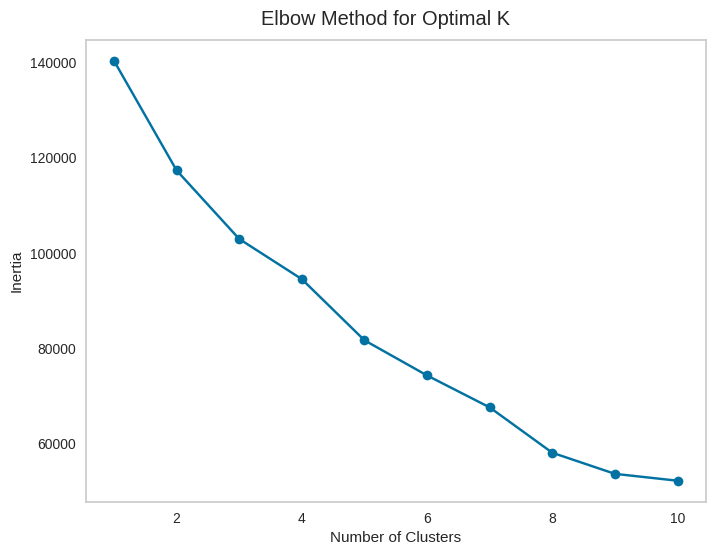

In [43]:
# Plotting elbow plot to visualize optimal clusters
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state = 2)
    kmeans.fit(df_normalized)
    distortions.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.suptitle('Elbow Method for Optimal K', y = 0.93)
plt.grid(False)
plt.show();

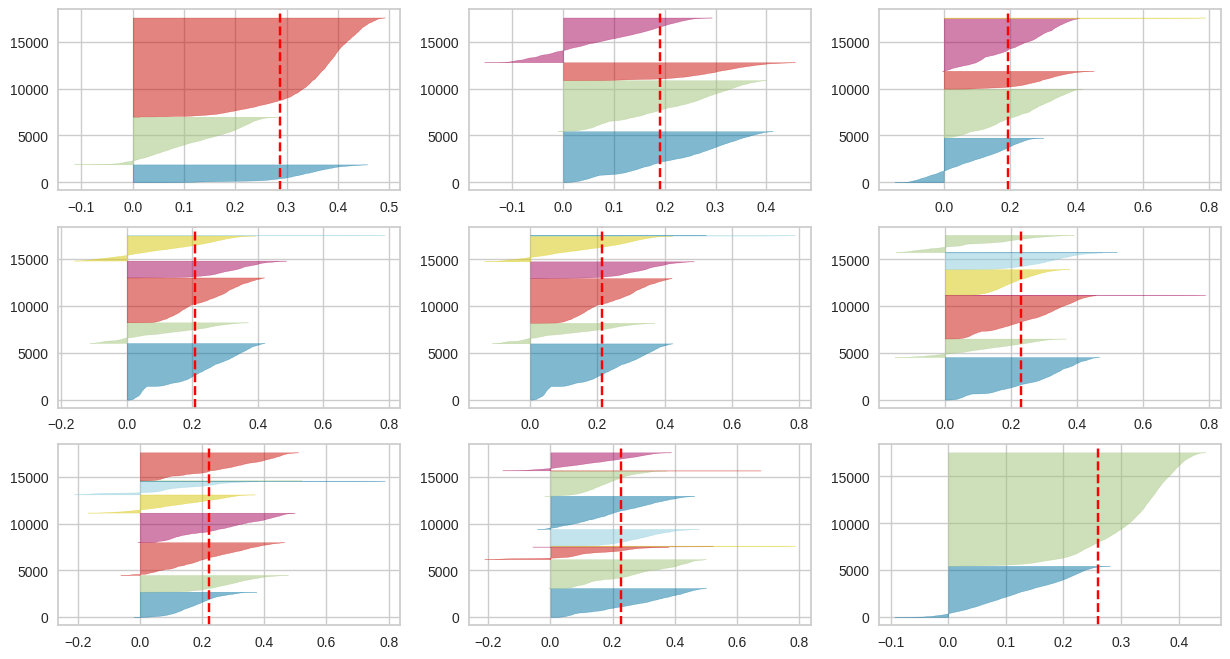

In [35]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:

    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 3)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_normalized)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x788570220ee0> (for post_execute):


KeyboardInterrupt: 

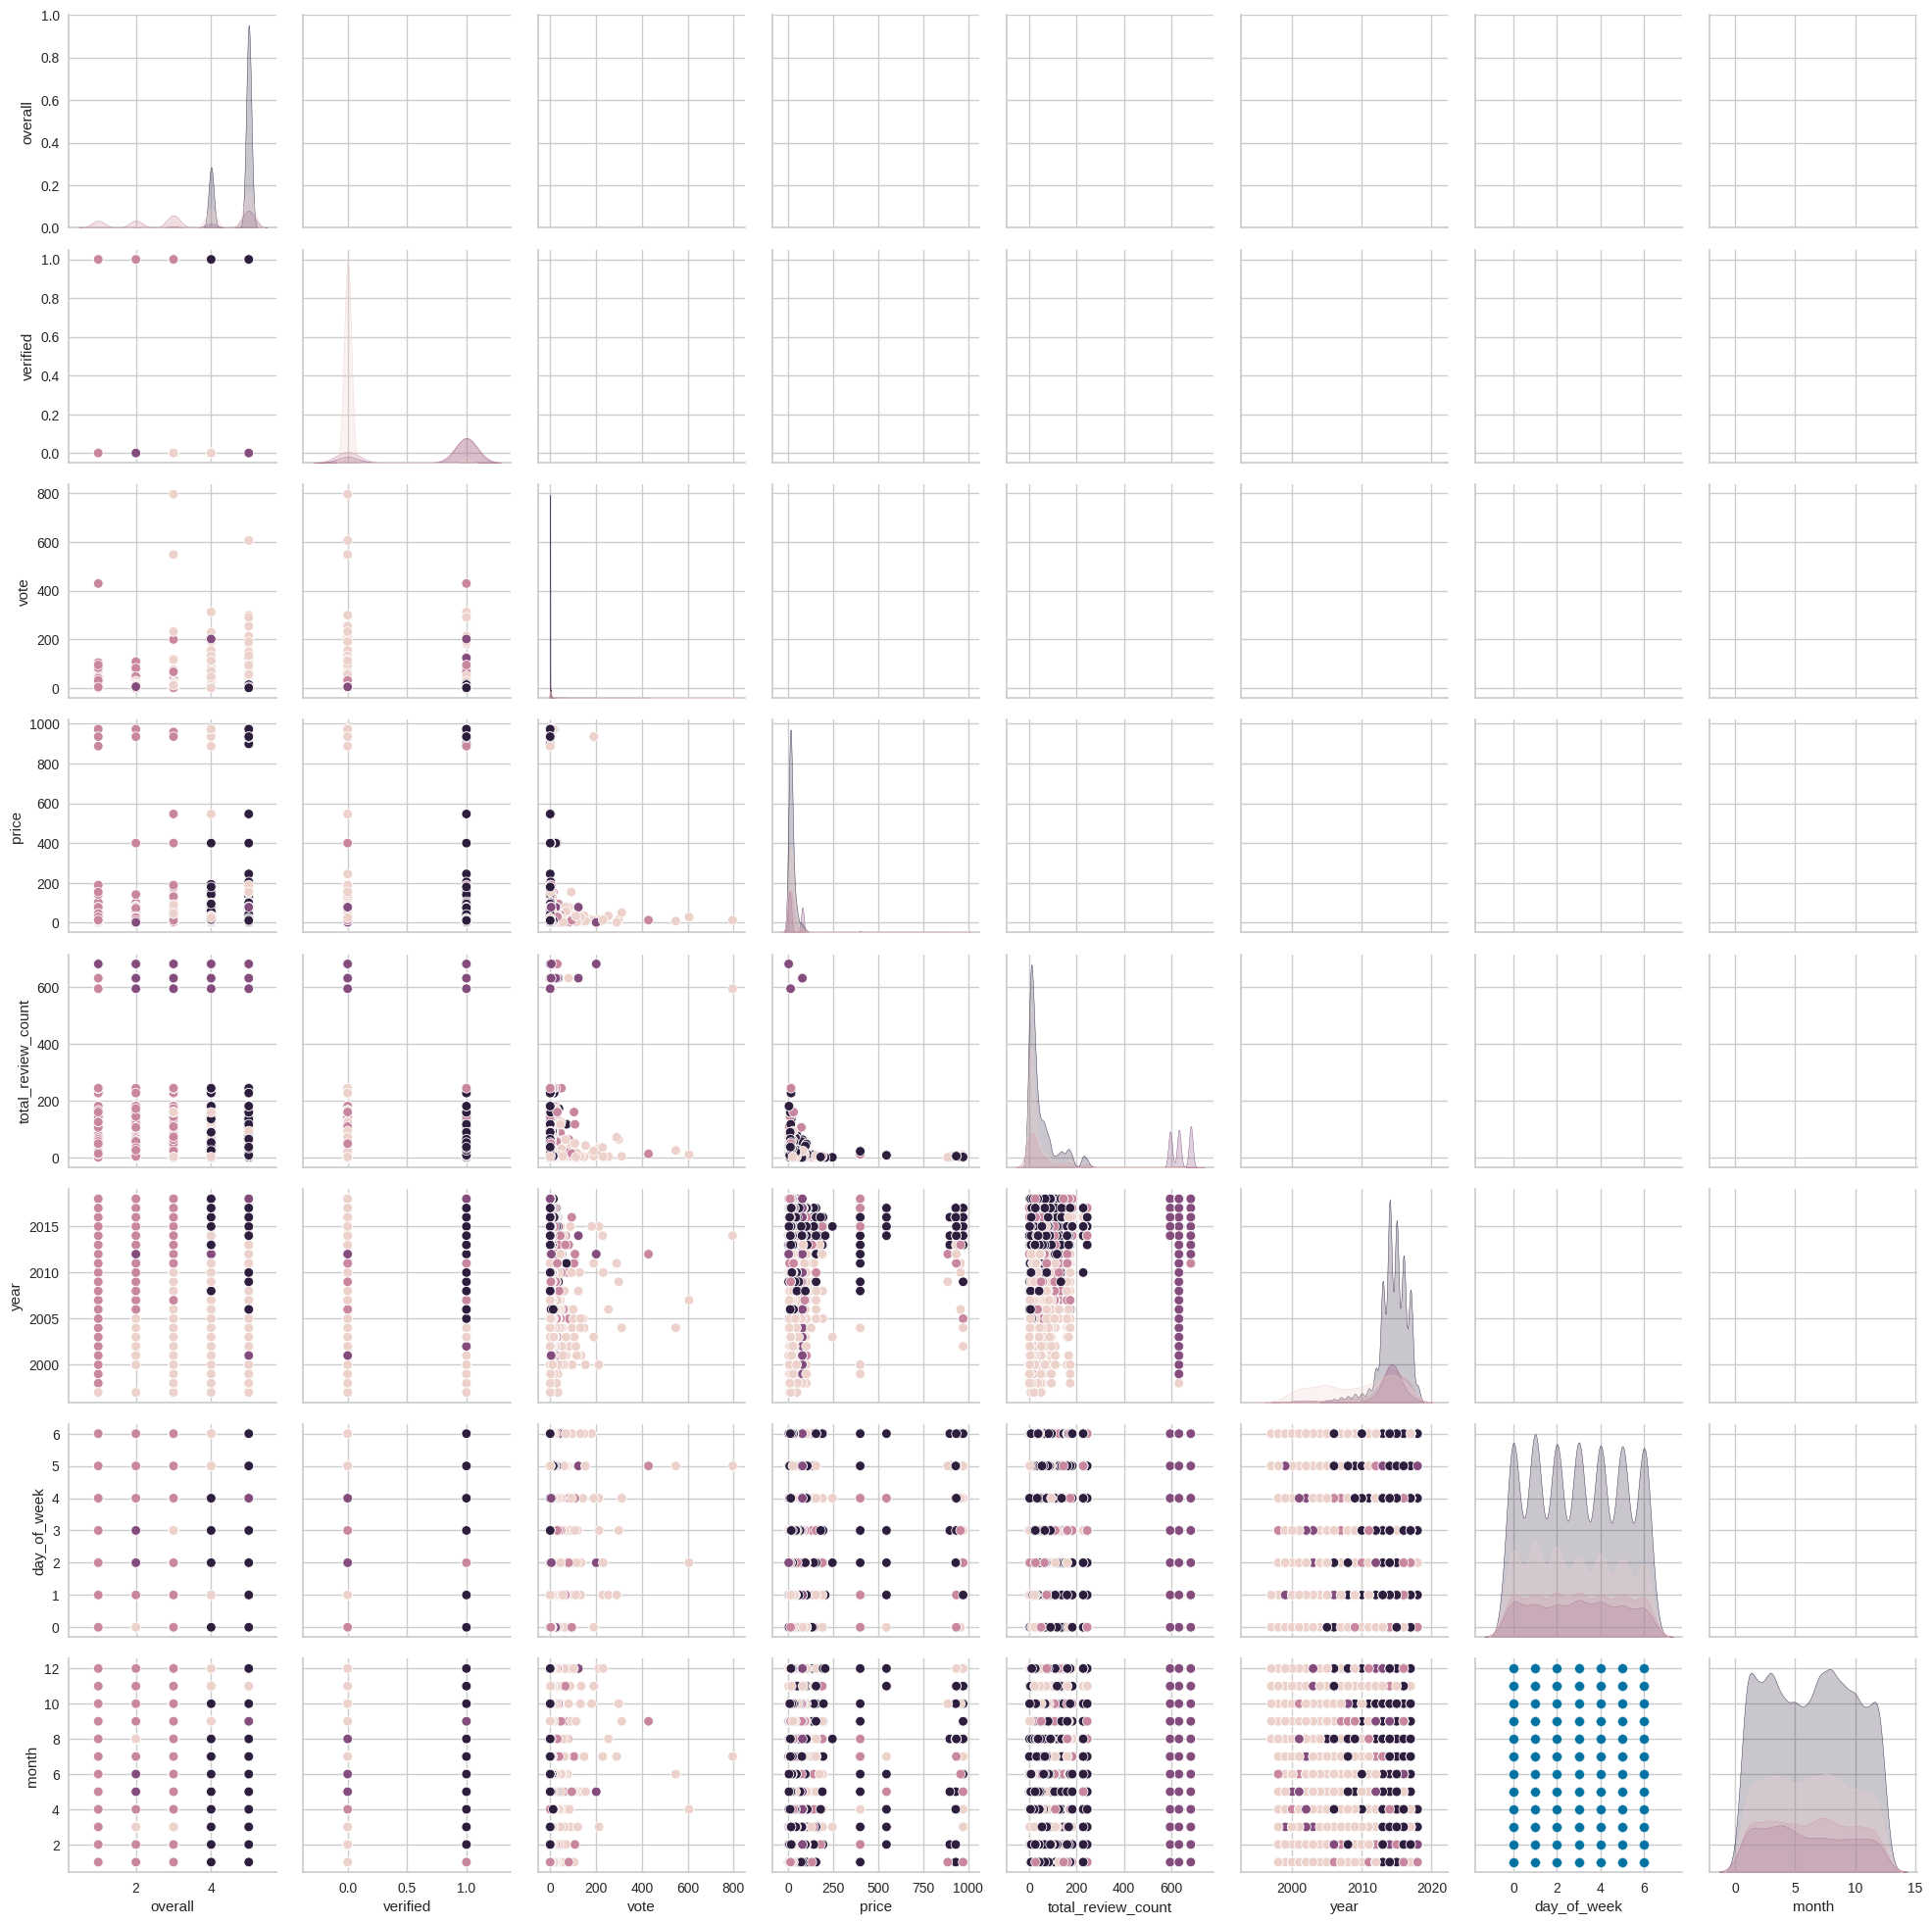

In [36]:
# Plotting pair plots with KMeans clusters
sns.pairplot(kmeans_df, hue='cluster_labels')

### Hierarchical Clustering

---

In [38]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster

In [40]:
Z = linkage(df_normalized, 'ward')
num_clusters = 5
clustering_df['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')

<ipython-input-40-a8bdf407e3af>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='cluster_no', ylabel='s_scores'>

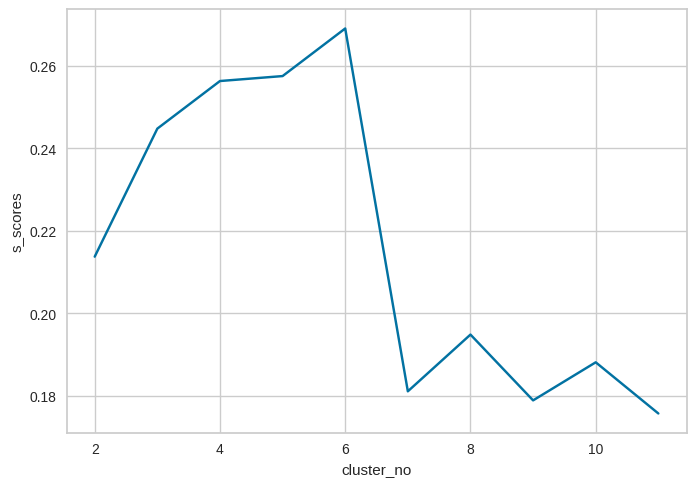

In [41]:
# Plotting Silhouette Scores
from sklearn.metrics import silhouette_score

s_scores = []

for k in range(2, 12):
  clust_labels = fcluster(Z, k, criterion = 'maxclust')
  s_scores.append(silhouette_score(df_normalized, clust_labels))

s_scores_df = pd.DataFrame(data={'cluster_no': [2,3,4,5,6,7,8,9,10,11], 's_scores':s_scores})
sns.lineplot(s_scores_df, x="cluster_no", y="s_scores")

KeyboardInterrupt: 

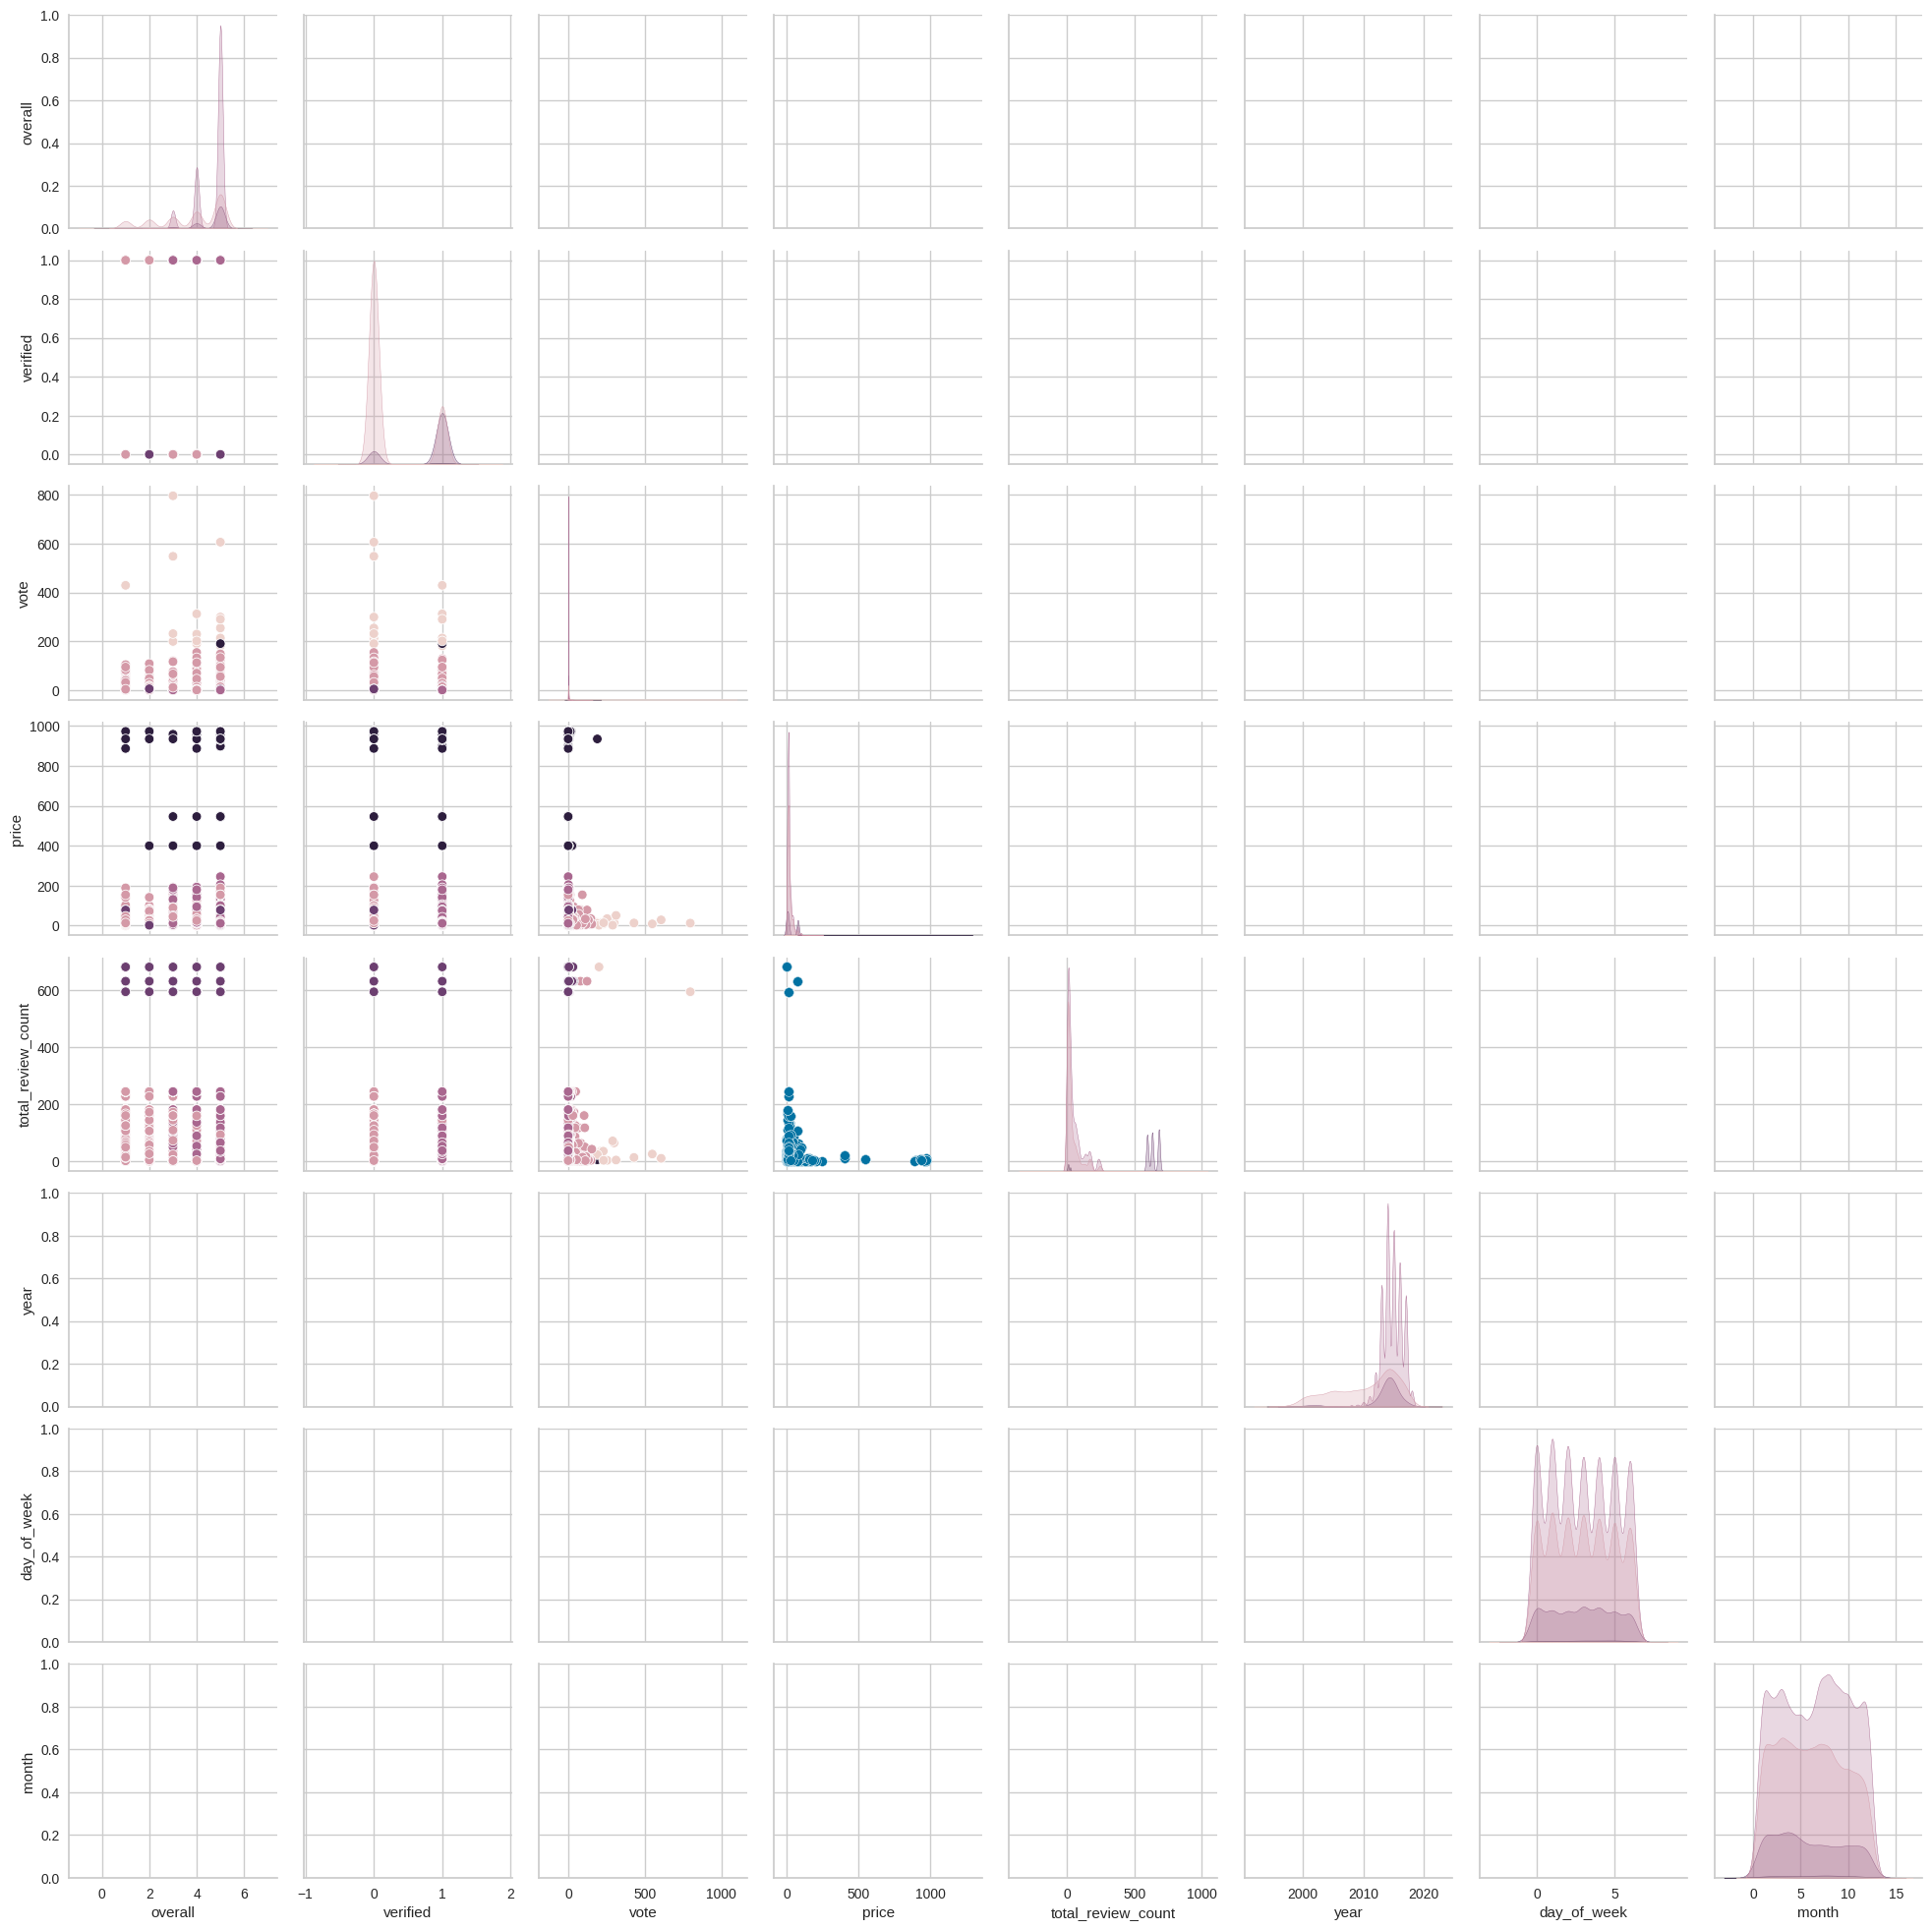

In [44]:
# Plotting pair plots by cluster
sns.pairplot(clustering_df, hue='cluster_labels')

### Investigating Cluster Characteristics

---

In [45]:
# Appending the cluster labels to our original dataframe

merged_df['hier_cluster_labels'] = clustering_df['cluster_labels']
merged_df['k_means_cluster_labels'] = kmeans_df['cluster_labels']

In [46]:
# Investigating the hierarchical clusters

merged_df[merged_df['hier_cluster_labels'] == 1].describe()

# the distinct point of this cluster is that the votes received were very high.

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.0,16.0
mean,4.000000,0.437500,324.375000,14.950625,102.375000,2009.250000,2.87500,7.812500,1.0,1.0
std,1.154701,0.512348,179.263261,13.014339,210.816468,4.711688,1.78419,2.786126,0.0,0.0
min,1.000000,0.000000,181.000000,1.730000,4.000000,2000.000000,0.00000,3.000000,1.0,1.0
25%,3.000000,0.000000,209.250000,7.885000,11.750000,2005.500000,1.75000,5.750000,1.0,1.0
50%,4.000000,0.000000,242.500000,12.650000,25.000000,2010.500000,2.50000,7.500000,1.0,1.0
75%,5.000000,1.000000,341.250000,14.825000,43.250000,2012.500000,4.25000,10.000000,1.0,1.0
max,5.000000,1.000000,796.000000,50.920000,682.000000,2015.000000,6.00000,12.000000,1.0,1.0


In [47]:
merged_df[merged_df['hier_cluster_labels'] == 2].describe()

#i suspect these are just the middle of the pack ones

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.0,6296.0
mean,3.773348,0.221887,3.652319,19.364868,37.209180,2010.339740,2.948380,6.136277,2.0,2.0
std,1.352993,0.415548,10.708929,19.593452,53.349176,5.163418,1.983259,3.393567,0.0,0.0
min,1.000000,0.000000,0.000000,0.010000,1.000000,1997.000000,0.000000,1.000000,2.0,2.0
25%,3.000000,0.000000,0.000000,8.210000,5.000000,2006.000000,1.000000,3.000000,2.0,2.0
50%,4.000000,0.000000,0.000000,13.820000,15.000000,2012.000000,3.000000,6.000000,2.0,2.0
75%,5.000000,0.000000,3.000000,22.810000,45.000000,2015.000000,5.000000,9.000000,2.0,2.0
max,5.000000,1.000000,154.000000,245.030000,632.000000,2018.000000,6.000000,12.000000,2.0,2.0


In [48]:
merged_df[merged_df['hier_cluster_labels'] == 3].describe()

#middle of the pack cluster #2, high ratings, high verification

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,9235.000000,9235.0,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.0,9235.0
mean,4.650785,1.0,0.313806,18.816258,48.589605,2014.726692,2.928749,6.497888,3.0,3.0
std,0.602750,0.0,1.581741,19.062630,59.349076,1.610831,2.002844,3.500808,0.0,0.0
min,2.000000,1.0,0.000000,0.010000,1.000000,2004.000000,0.000000,1.000000,3.0,3.0
25%,4.000000,1.0,0.000000,8.375000,8.000000,2014.000000,1.000000,3.000000,3.0,3.0
50%,5.000000,1.0,0.000000,13.780000,23.000000,2015.000000,3.000000,7.000000,3.0,3.0
75%,5.000000,1.0,0.000000,20.930000,66.000000,2016.000000,5.000000,9.000000,3.0,3.0
max,5.000000,1.0,30.000000,245.030000,245.000000,2018.000000,6.000000,12.000000,3.0,3.0


In [49]:
merged_df[merged_df['hier_cluster_labels'] == 4].describe()

#this one has a super high review count compared to others

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.0,1905.0
mean,4.573228,0.796850,0.325459,30.235575,638.337008,2013.580577,2.918635,5.985827,4.0,4.0
std,0.840804,0.402449,2.027673,33.825788,35.792246,3.276146,1.988463,3.560449,0.0,0.0
min,1.000000,0.000000,0.000000,1.730000,595.000000,1998.000000,0.000000,1.000000,4.0,4.0
25%,4.000000,1.000000,0.000000,1.730000,595.000000,2013.000000,1.000000,3.000000,4.0,4.0
50%,5.000000,1.000000,0.000000,12.310000,632.000000,2014.000000,3.000000,6.000000,4.0,4.0
75%,5.000000,1.000000,0.000000,77.950000,682.000000,2015.000000,5.000000,9.000000,4.0,4.0
max,5.000000,1.000000,36.000000,77.950000,682.000000,2018.000000,6.000000,12.000000,4.0,4.0


In [50]:
merged_df[merged_df['hier_cluster_labels'] == 5].describe()

#the distinct feature of this cluster is that the price is very high.

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,89.000000,89.000000,89.000000,89.00000,89.000000,89.000000,89.000000,89.000000,89.0,89.0
mean,4.393258,0.752809,4.202247,690.15618,11.539326,2013.191011,3.078652,6.359551,5.0,5.0
std,1.103898,0.433823,20.578110,262.93590,7.370174,4.086776,1.984169,3.327732,0.0,0.0
min,1.000000,0.000000,0.000000,399.80000,2.000000,1999.000000,0.000000,1.000000,5.0,5.0
25%,4.000000,1.000000,0.000000,399.80000,7.000000,2012.000000,1.000000,4.000000,5.0,5.0
50%,5.000000,1.000000,0.000000,886.93000,10.000000,2015.000000,3.000000,7.000000,5.0,5.0
75%,5.000000,1.000000,2.000000,934.62000,23.000000,2016.000000,5.000000,9.000000,5.0,5.0
max,5.000000,1.000000,190.000000,972.49000,23.000000,2018.000000,6.000000,12.000000,5.0,5.0


In [51]:
#now for kmeans NOTE THESE CLUSTERS TURNED OUT THE EXACT SAME AS THE HIERARCHIAL ONES

merged_df[merged_df['k_means_cluster_labels'] == 1].describe()

# the distinct point of this cluster is that the votes received were very high.

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.0,16.0
mean,4.000000,0.437500,324.375000,14.950625,102.375000,2009.250000,2.87500,7.812500,1.0,1.0
std,1.154701,0.512348,179.263261,13.014339,210.816468,4.711688,1.78419,2.786126,0.0,0.0
min,1.000000,0.000000,181.000000,1.730000,4.000000,2000.000000,0.00000,3.000000,1.0,1.0
25%,3.000000,0.000000,209.250000,7.885000,11.750000,2005.500000,1.75000,5.750000,1.0,1.0
50%,4.000000,0.000000,242.500000,12.650000,25.000000,2010.500000,2.50000,7.500000,1.0,1.0
75%,5.000000,1.000000,341.250000,14.825000,43.250000,2012.500000,4.25000,10.000000,1.0,1.0
max,5.000000,1.000000,796.000000,50.920000,682.000000,2015.000000,6.00000,12.000000,1.0,1.0


In [52]:
merged_df[merged_df['k_means_cluster_labels'] == 2].describe()

#middle of the pack

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.0,6296.0
mean,3.773348,0.221887,3.652319,19.364868,37.209180,2010.339740,2.948380,6.136277,2.0,2.0
std,1.352993,0.415548,10.708929,19.593452,53.349176,5.163418,1.983259,3.393567,0.0,0.0
min,1.000000,0.000000,0.000000,0.010000,1.000000,1997.000000,0.000000,1.000000,2.0,2.0
25%,3.000000,0.000000,0.000000,8.210000,5.000000,2006.000000,1.000000,3.000000,2.0,2.0
50%,4.000000,0.000000,0.000000,13.820000,15.000000,2012.000000,3.000000,6.000000,2.0,2.0
75%,5.000000,0.000000,3.000000,22.810000,45.000000,2015.000000,5.000000,9.000000,2.0,2.0
max,5.000000,1.000000,154.000000,245.030000,632.000000,2018.000000,6.000000,12.000000,2.0,2.0


In [53]:
merged_df[merged_df['k_means_cluster_labels'] == 3].describe()

#middle of the pack

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,9235.000000,9235.0,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000,9235.0,9235.0
mean,4.650785,1.0,0.313806,18.816258,48.589605,2014.726692,2.928749,6.497888,3.0,3.0
std,0.602750,0.0,1.581741,19.062630,59.349076,1.610831,2.002844,3.500808,0.0,0.0
min,2.000000,1.0,0.000000,0.010000,1.000000,2004.000000,0.000000,1.000000,3.0,3.0
25%,4.000000,1.0,0.000000,8.375000,8.000000,2014.000000,1.000000,3.000000,3.0,3.0
50%,5.000000,1.0,0.000000,13.780000,23.000000,2015.000000,3.000000,7.000000,3.0,3.0
75%,5.000000,1.0,0.000000,20.930000,66.000000,2016.000000,5.000000,9.000000,3.0,3.0
max,5.000000,1.0,30.000000,245.030000,245.000000,2018.000000,6.000000,12.000000,3.0,3.0


In [54]:
merged_df[merged_df['k_means_cluster_labels'] == 4].describe()

# high review count

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.0,1905.0
mean,4.573228,0.796850,0.325459,30.235575,638.337008,2013.580577,2.918635,5.985827,4.0,4.0
std,0.840804,0.402449,2.027673,33.825788,35.792246,3.276146,1.988463,3.560449,0.0,0.0
min,1.000000,0.000000,0.000000,1.730000,595.000000,1998.000000,0.000000,1.000000,4.0,4.0
25%,4.000000,1.000000,0.000000,1.730000,595.000000,2013.000000,1.000000,3.000000,4.0,4.0
50%,5.000000,1.000000,0.000000,12.310000,632.000000,2014.000000,3.000000,6.000000,4.0,4.0
75%,5.000000,1.000000,0.000000,77.950000,682.000000,2015.000000,5.000000,9.000000,4.0,4.0
max,5.000000,1.000000,36.000000,77.950000,682.000000,2018.000000,6.000000,12.000000,4.0,4.0


In [55]:
merged_df[merged_df['k_means_cluster_labels'] == 5].describe()

# high price cluster

,overall,verified,vote,price,total_review_count,year,day_of_week,month,hier_cluster_labels,k_means_cluster_labels
count,89.000000,89.000000,89.000000,89.00000,89.000000,89.000000,89.000000,89.000000,89.0,89.0
mean,4.393258,0.752809,4.202247,690.15618,11.539326,2013.191011,3.078652,6.359551,5.0,5.0
std,1.103898,0.433823,20.578110,262.93590,7.370174,4.086776,1.984169,3.327732,0.0,0.0
min,1.000000,0.000000,0.000000,399.80000,2.000000,1999.000000,0.000000,1.000000,5.0,5.0
25%,4.000000,1.000000,0.000000,399.80000,7.000000,2012.000000,1.000000,4.000000,5.0,5.0
50%,5.000000,1.000000,0.000000,886.93000,10.000000,2015.000000,3.000000,7.000000,5.0,5.0
75%,5.000000,1.000000,2.000000,934.62000,23.000000,2016.000000,5.000000,9.000000,5.0,5.0
max,5.000000,1.000000,190.000000,972.49000,23.000000,2018.000000,6.000000,12.000000,5.0,5.0
